In [127]:
#  Problem to solve
#  -----------------
#  The goal of this project is to define a location for a wine bar in the city of Madrid.
# First Step: We will use the data from the city of Madrid to find the best location for the bar, for this , we have to scrape  the neighborhoods of the city of Madrid.

In [2]:
#!pip install geopy
from geopy.geocoders import Nominatim
#!pip install folium

In [3]:
#  Import libraries
#  ----------------
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# for converting an address into latitude and longitude values
from geopy.geocoders import Nominatim

import folium
import folium.plugins as plugins

In [4]:


# for finding geographical coordinates
#!pip install geopy
import geocoder

# for converting an address into latitude and longitude values
from geopy.geocoders import Nominatim

# for rending maps
import folium

# for removing Spanish accents from map labels in Folium (encoding incompatibility)
import unicodedata

# for clustering neighbourhoods
from sklearn.cluster import KMeans

# for drawing the elbow method and scatterplot
import matplotlib.pyplot as plt

# for displaying map of clusters
import matplotlib.cm as cm
import matplotlib.colors as colors

# for displaying the scatterplot of household income vs people per market
import seaborn as sns

# for arranging labels around the scatterplot to avoid overlapping neighbourhood names
from adjustText import adjust_text

In [5]:
# Scrapping wikipedia in order to get the neighborhoods of the city of Madrid
# ---------------------------------------------------------------------------
url = "https://en.wikipedia.org/wiki/List_of_neighborhoods_of_Madrid"
r = requests.get(url)

In [6]:
r # right now we have the html code of the page, 200 = ok

<Response [200]>

In [7]:
soup = BeautifulSoup(r.content, 'html.parser')

In [8]:
soup.title.text # we have the title of the page

'List of neighborhoods of Madrid - Wikipedia'

In [9]:
# The following code will get the table with the neighborhoods of the city of Madrid
table = soup.find('table', {'class': 'wikitable sortable'})

In [10]:
table # we have the table with the neighborhoods of the city of Madrid

<table class="wikitable sortable">
<tbody><tr>
<th>District name (number)
</th>
<th>District location
</th>
<th>Number
</th>
<th>Name
</th>
<th>Image
</th></tr>
<tr>
<td rowspan="6"><a href="/wiki/Centro_(Madrid)" title="Centro (Madrid)">Centro</a> (1)
</td>
<td rowspan="6"><br/><a class="image" href="/wiki/File:Centro_District_loc-map.svg"><img alt="Centro District loc-map.svg" data-file-height="527" data-file-width="527" decoding="async" height="200" src="//upload.wikimedia.org/wikipedia/commons/thumb/0/09/Centro_District_loc-map.svg/200px-Centro_District_loc-map.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/0/09/Centro_District_loc-map.svg/300px-Centro_District_loc-map.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/0/09/Centro_District_loc-map.svg/400px-Centro_District_loc-map.svg.png 2x" width="200"/></a>
</td>
<td align="center">11
</td>
<td align="center"><a href="/wiki/Palacio_(Madrid)" title="Palacio (Madrid)">Palacio</a>
</td>
<td align="center"

In [11]:
# Finding the tr tags in the table ( just the header)
trs = table.find_all('tr')[0]

In [12]:
trs # we have the header of the table

<tr>
<th>District name (number)
</th>
<th>District location
</th>
<th>Number
</th>
<th>Name
</th>
<th>Image
</th></tr>

In [13]:
# Finding the th tags in the header
ths = trs.find_all('th')

In [14]:
print(ths) # we have the header of the table

[<th>District name (number)
</th>, <th>District location
</th>, <th>Number
</th>, <th>Name
</th>, <th>Image
</th>]


In [15]:
# Placeholder for list of neighbourhoods
neighbourhoods = []

# Iterate through the rows of the table
# Note: each district has sub-rows of neighbourhoods
for row in table.findAll("tr"):
    cells = row.findAll('td')

    # Parse 1st neighbourhood of the district
    if len(cells)==5:
        neighbourhoods.append(cells[3].find(text=True).replace('\n', '').rstrip().lstrip().upper())

    # Parse sub-rows (rest of neighbourhoods of the district)
    elif len(cells)==3:
        neighbourhoods.append(cells[1].find(text=True).replace('\n', '').rstrip().lstrip().upper())

print(f'Number of neighbourhoods: {len(neighbourhoods)}')

Number of neighbourhoods: 131


In [16]:
neighbourhoods # we have the list of the neighborhoods of the city of Madrid

['PALACIO',
 'EMBAJADORES',
 'CORTES',
 'JUSTICIA',
 'UNIVERSIDAD',
 'SOL',
 'IMPERIAL',
 'ACACIAS',
 'CHOPERA',
 'LEGAZPI',
 'DELICIAS',
 'PALOS DE MOGUER',
 'ATOCHA',
 'PACÍFICO',
 'ADELFAS',
 'ESTRELLA',
 'IBIZA',
 'LOS JERÓNIMOS',
 'NIÑO JESÚS',
 'RECOLETOS',
 'GOYA',
 'FUENTE DEL BERRO',
 'GUINDALERA',
 'LISTA',
 'CASTELLANA',
 'EL VISO',
 'PROSPERIDAD',
 'CIUDAD JARDÍN',
 'HISPANOAMÉRICA',
 'NUEVA ESPAÑA',
 'CASTILLA',
 'BELLAS VISTAS',
 'CUATRO CAMINOS',
 'CASTILLEJOS',
 'ALMENARA',
 'VALDEACEDERAS',
 'BERRUGUETE',
 'GAZTAMBIDE',
 'ARAPILES',
 'TRAFALGAR',
 'ALMAGRO',
 'RÍOS ROSAS',
 'VALLEHERMOSO',
 'EL PARDO',
 'FUENTELARREINA',
 'PEÑAGRANDE',
 'PILAR',
 'LA PAZ',
 'VALVERDE',
 'MIRASIERRA',
 'EL GOLOSO',
 'CASA DE CAMPO',
 'ARGÜELLES',
 'CIUDAD UNIVERSITARIA',
 'VALDEZARZA',
 'VALDEMARÍN',
 'EL PLANTÍO',
 'ARAVACA',
 'LOS CÁRMENES',
 'PUERTA DEL ÁNGEL',
 'LUCERO',
 'ALUCHE',
 'CAMPAMENTO',
 'CUATRO VIENTOS',
 'LAS ÁGUILAS',
 'COMILLAS',
 'OPAÑEL',
 'SAN ISIDRO',
 'VISTA ALEGR

In [17]:
# Creating a dataframe with the neighborhoods of the city of Madrid
# ---------------------------------------------------------------------------
neighbourhoods_df = pd.DataFrame(neighbourhoods, columns=['Neighbourhood'])

In [18]:
neighbourhoods_df # we have the dataframe with the neighborhoods of the city of Madrid

,Neighbourhood
0,PALACIO
1,EMBAJADORES
2,CORTES
3,JUSTICIA
4,UNIVERSIDAD
...,...
126,ALAMEDA DE OSUNA
127,AEROPUERTO
128,CASCO HISTÓRICO DE BARAJAS
129,TIMÓN


In [19]:
# Geocoder fails to locate some of the neighbourhoods correctly and therefore it is necessary
# to request the coordinates using a different name for these particular areas.
def rename(neighbourhood):
    new_name = neighbourhood
    if new_name == 'CASCO HISTÓRICO DE VICÁLVARO':
        new_name = 'VICÁLVARO'
    elif new_name == 'QUINTANA':
        new_name = 'PARQUE DE CALERO'
    elif new_name == 'BUTARQUE':
        new_name = 'VILLAVERDE BAJO'
    return new_name

# Function that retrieves the geographical coordinates for a given neighborhood
def get_coordinates(row):
    # initialize variable to None
    lat_lng_coords = None

    # loop until we get the coordinates
    while lat_lng_coords is None:
      g = geocoder.arcgis(f'{rename(row["Neighbourhood"])}, Madrid')
      lat_lng_coords = g.latlng

    # return pair lat,long
    return pd.Series([lat_lng_coords[0], lat_lng_coords[1]])

In [20]:
neighbourhoods_df[['Latitude', 'Longitude']] = neighbourhoods_df.apply(get_coordinates, axis=1)

In [21]:
neighbourhoods_df.head() # we have the dataframe with the neighborhoods of the city of Madrid and their coordinates

,Neighbourhood,Latitude,Longitude
0,PALACIO,40.41517,-3.71273
1,EMBAJADORES,40.40803,-3.70067
2,CORTES,40.41589,-3.69636
3,JUSTICIA,40.42479,-3.69308
4,UNIVERSIDAD,40.42565,-3.70726


In [22]:
neighbourhoods_df.shape

(131, 3)

In [23]:
# Checking null values in the dataframe
# ---------------------------------------------------------------------------

In [24]:
neighbourhoods_df.isnull().sum() # we have the number of null values in the dataframe

Neighbourhood    0
Latitude         0
Longitude        0
dtype: int64

In [25]:
# Visualizing the dataframe
# ---------------------------------------------------------------------------

In [26]:
address = 'Madrid, Spain'
geolocator = Nominatim(user_agent="madrid_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(f'The geograpical coordinates of Madrid are {latitude}, {longitude}')

The geograpical coordinates of Madrid are 40.4167047, -3.7035825


In [27]:
# Creating a map of the city of Madrid
# ---------------------------------------------------------------------------

In [28]:
# Creating the map
#map = folium.Map(
   # location=[latitude, longitude],
   # zoom_start=12,
    #tiles='Stamen Terrain'
#)

In [29]:
# Adding the markers to the map
# ---------------------------------------------------------------------------

In [30]:
#for index, row in neighbourhoods_df.iterrows():
   # folium.Marker(
       # location=[row['Latitude'], row['Longitude']],
        #popup=row['Neighbourhood'],
       # icon=folium.Icon(color='red')
  #  ).add_to(map)


In [31]:
# Saving the map
# ---------------------------------------------------------------------------

In [32]:
#map.save('madrid_map.html')

In [33]:
#map

In [34]:
# Spanish accents are not correctly rendered in Folium
# to remove them for a better understanding of the map
def remove_accents(input_str):
    nfkd_form = unicodedata.normalize('NFKD', input_str)
    only_ascii = nfkd_form.encode('ASCII', 'ignore')
    return only_ascii.decode("utf-8")

In [35]:
# create map of Madrid using latitude and longitude values
map_madrid = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(neighbourhoods_df['Latitude'], neighbourhoods_df['Longitude'], neighbourhoods_df['Neighbourhood']):
    label = folium.Popup(remove_accents(label), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_madrid)

map_madrid

In [36]:
#---------------------------------------------------------------------------



In [37]:
# Establishing a connection to foursquare API
# ---------------------------------------------------------------------------

In [38]:
tok1 = "RRLQJ3E2XUVOIOJ1JCCTVG5T2TW5EUVL35NBIEAJGO5UHUH2"
tok2 = "IZUZ45XFYXTK0NNIBHIF412VCEOZGOMSLUN5CWOT50IERA5S"

In [39]:
#find_places('wine', latitude, longitude)

In [40]:
# Function to find venues in a given neighbourhood
def getnearbyvenues (names, latitudes, longitudes, radius=500):

    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):

        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?' + \
            '&client_id={}'.format(tok1) + \
            '&client_secret={}'.format(tok2) + \
            '&v=20180323' + \
            '&ll={},{}'.format(lat, lng) + \
            '&radius={}'.format(radius)+\
            '&limit=100'


        # make the GET request
        results = requests.get(url).json()["response"]['venues']

        # return only relevant information for each nearby venue
        venues_list.append([(
            name,
            lat,
            lng,
            v['name'],
            v['location']['lat'],
            v['location']['lng'],
            v['categories'][0]['name']) for v in results if v['categories']])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood',
                  'Neighbourhood Latitude',
                  'Neighbourhood Longitude',
                  'Venue',
                  'Venue Latitude',
                  'Venue Longitude',
                  'Venue Category']

    return nearby_venues

In [41]:
# Search for venues within 1Km of radius from the neighbourhood centre point
radius = 1000

madrid_venues = getnearbyvenues(names=neighbourhoods_df['Neighbourhood'],
                                   latitudes=neighbourhoods_df['Latitude'],
                                   longitudes=neighbourhoods_df['Longitude'],
                                   radius=radius)

print(madrid_venues.shape)
madrid_venues.head()

(6018, 7)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,PALACIO,40.41517,-3.71273,Instituto Italiano de Cultura,40.415197,-3.712883,General College & University
1,PALACIO,40.41517,-3.71273,Cervecería La Mayor,40.415218,-3.712194,Beer Bar
2,PALACIO,40.41517,-3.71273,Consejo De Estado,40.415129,-3.713384,Government Building
3,PALACIO,40.41517,-3.71273,Santa Iglesia Catedral de Santa María la Real ...,40.415767,-3.714516,Church
4,PALACIO,40.41517,-3.71273,Iglesia del Sacramento,40.415070,-3.712244,Church


In [42]:
#---------------------------------------------------------------------------

In [43]:
# Clustering the venues in the neighbourhood
# ---------------------------------------------------------------------------

In [44]:
# applying one hot encoding to the category column
madrid_venues_categ = pd.get_dummies(madrid_venues['Venue Category'])
# adding the neightbourhood column back to the dataframe
madrid_venues_categ['Neighbourhood'] = madrid_venues['Neighbourhood']

In [45]:
madrid_venues_categ.head()

,Accessories Store,Adult Boutique,Adult Education Center,Advertising Agency,African Restaurant,Airport,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,...,Water Park,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit,Neighbourhood
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,PALACIO
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,PALACIO
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,PALACIO
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,PALACIO
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,PALACIO


In [46]:
# Grouping the venues by neighbourhood
madrid_venues_grouped = madrid_venues_categ.groupby('Neighbourhood').mean().reset_index()
madrid_venues_grouped.head(25)

,Neighbourhood,Accessories Store,Adult Boutique,Adult Education Center,Advertising Agency,African Restaurant,Airport,Airport Gate,Airport Lounge,Airport Service,...,Warehouse,Water Park,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,ABRANTES,0.000000,0.0,0.0,0.0,0.0,0.00,0.000000,0.00,0.00,...,0.0,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.00,0.000000
1,ACACIAS,0.000000,0.0,0.0,0.0,0.0,0.00,0.000000,0.00,0.00,...,0.0,0.0,0.0,0.00000,0.021277,0.0,0.000000,0.000000,0.00,0.021277
2,ADELFAS,0.000000,0.0,0.0,0.0,0.0,0.00,0.000000,0.00,0.00,...,0.0,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.00,0.000000
3,AEROPUERTO,0.000000,0.0,0.0,0.0,0.0,0.02,0.640000,0.04,0.08,...,0.0,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.00,0.000000
4,ALAMEDA DE OSUNA,0.000000,0.0,0.0,0.0,0.0,0.00,0.000000,0.00,0.00,...,0.0,0.0,0.0,0.02381,0.000000,0.0,0.000000,0.000000,0.00,0.000000
5,ALMAGRO,0.000000,0.0,0.0,0.0,0.0,0.00,0.000000,0.00,0.00,...,0.0,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.00,0.000000
6,ALMENARA,0.000000,0.0,0.0,0.0,0.0,0.00,0.000000,0.00,0.00,...,0.0,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.00,0.000000
7,ALMENDRALES,0.000000,0.0,0.0,0.0,0.0,0.00,0.000000,0.00,0.00,...,0.0,0.0,0.0,0.00000,0.020833,0.0,0.000000,0.000000,0.00,0.000000
8,ALUCHE,0.000000,0.0,0.0,0.0,0.0,0.00,0.000000,0.00,0.00,...,0.0,0.0,0.0,0.00000,0.020833,0.0,0.000000,0.000000,0.00,0.000000
9,AMPOSTA,0.000000,0.0,0.0,0.0,0.0,0.00,0.000000,0.00,0.00,...,0.0,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.00,0.000000


In [47]:
#madrid_venues_grouped = madrid_venues_categ['Airport'].sum()
madrid_venues_grouped.sum(axis=1)

C:\Users\PLATER~1\AppData\Local\Temp/ipykernel_7792/1602861246.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  madrid_venues_grouped.sum(axis=1)


0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
126    1.0
127    1.0
128    1.0
129    1.0
130    1.0
Length: 131, dtype: float64

In [48]:
#Print each district along with top 5 most common venues
num_top_venues = 5

for hood in madrid_venues_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = madrid_venues_grouped[madrid_venues_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending = False).reset_index(drop = True).head(num_top_venues))
    print('\n')

----ABRANTES----
          venue  freq
0        Bakery  0.07
1           Bar  0.07
2          Park  0.04
3      Pharmacy  0.04
4  Soccer Field  0.04


----ACACIAS----
                venue  freq
0                Park  0.09
1         Pizza Place  0.06
2                Café  0.04
3  Salon / Barbershop  0.04
4        Dance Studio  0.04


----ADELFAS----
                venue  freq
0                Bank  0.08
1                 Bar  0.06
2       Metro Station  0.04
3                Café  0.04
4  Spanish Restaurant  0.04


----AEROPUERTO----
              venue  freq
0      Airport Gate  0.64
1   Airport Service  0.08
2    Airport Lounge  0.04
3  Airport Terminal  0.04
4      Optical Shop  0.04


----ALAMEDA DE OSUNA----
                venue  freq
0       Travel Agency  0.17
1                 Bar  0.07
2           Bookstore  0.07
3                Bank  0.05
4  Italian Restaurant  0.05


----ALMAGRO----
                venue  freq
0            Building  0.09
1              Office  0.09
2  Sp

### External data loading and cleaning

In [49]:
#---------------------------------------------------------------------------

In [50]:
# Loading the data
# ---------------------------------------------------------------------------

In [51]:
# Load the data
df_madrid_population = pd.read_excel('Poblacion_35-39 por distrito y barrio.xls', header=4, names=['District', 'Neighbourhood', 'Age','Population'])#, converters={'Population': int})
print(df_madrid_population.shape)
df_madrid_population.head()

(266, 4)


,District,Neighbourhood,Age,Population
0,CENTRO,PALACIO,Total,23603.0
1,CENTRO,PALACIO,35 - 39,2012.0
2,CENTRO,EMBAJADORES,Total,46649.0
3,CENTRO,EMBAJADORES,35 - 39,5107.0
4,CENTRO,CORTES,Total,10867.0


In [52]:
# Dropping District Column
df_madrid_population = df_madrid_population.drop(columns=['District'])
# Dropping the rows when Age is 'Total'


In [53]:
df_madrid_population = df_madrid_population[df_madrid_population['Age'] != 'Total']

In [125]:
# Converting the Age column to integer
df_madrid_population['Age'] = df_madrid_population['Age'].astype(int)

In [126]:
# making population column as integer
df_madrid_population.dtypes

Neighbourhood     object
Age               object
Population       float64
dtype: object

In [55]:
# Finding NaN values
df_madrid_population.isnull().sum()

Neighbourhood    3
Age              4
Population       4
dtype: int64

In [56]:
# Dropping the rows with NaN values
df_madrid_population = df_madrid_population.dropna()

In [57]:
# Loading vulnerability data

In [58]:
#---------------------------------------------------------------------------

In [59]:
# Loading the data

In [60]:
df_madrid_income = pd.read_excel('Vulnerabilidad_Madrid.xlsx',header=2)
print(df_madrid_income.shape)
df_madrid_income.head()

(131, 21)


,Ranking Vulnerabilidad,DISTRITO,BARRIO,Tasa Extranjeros,Esperanza de Vida,Sin Estudios o Primarios,Renta media hogar,Tasa Paro Absoluto,Tasa Paro mayores 45,Tasa de Parados Sin Prestación,...,Tasa demanda Dependientes,Familas perceptoras renta mínima,Tasa SAD Dependencia,Tasa Teleasistencia Dependencia,Población,Estatus Socio-Económico,Actividad Económica,Desarrollo Urbano,Necesidades Asistenciales,Vulnerabilidad
0,63,01. Centro,011. Palacio,7.95,82.99,25.384970,35509.212948,7.41,9.920,4.104906,...,0.037653,926,0.032,0.035,0.005976,0.007642,0.007969,0.007620,0.007487,0.007459
1,45,01. Centro,012. Embajadores,16.93,83.70,33.637783,26761.666506,7.69,11.150,4.104906,...,0.037653,926,0.032,0.035,0.009284,0.007655,0.008483,0.007642,0.007487,0.008193
2,64,01. Centro,013. Cortes,9.90,82.32,21.475771,37426.712735,6.82,9.320,4.104906,...,0.037653,926,0.032,0.035,0.005974,0.007639,0.007637,0.007607,0.007487,0.007344
3,66,01. Centro,014. Justicia,9.93,85.57,20.913148,41583.813435,6.25,9.145,4.104906,...,0.037653,926,0.032,0.035,0.005911,0.007634,0.007469,0.007600,0.007487,0.007273
4,62,01. Centro,015. Universidad,11.60,84.09,24.474370,31866.058946,6.51,9.615,4.104906,...,0.037653,926,0.032,0.035,0.006782,0.007647,0.007692,0.007630,0.007487,0.007502


In [61]:
#---------------------------------------------------------------------------

In [62]:
# Cleaning Dataframes
# ---------------------------------------------------------------------------

In [63]:
# Cleaning the dataframes
# Applying a df_madrid_income to remove all columns except "DISTRITO" ,"BARRIO" y "Renta media hogar"
df_madrid_income = df_madrid_income[['DISTRITO', 'BARRIO', 'Renta media hogar']]

In [64]:
#---------------------------------------------------------------------------

In [65]:
df_madrid_income.head()

,DISTRITO,BARRIO,Renta media hogar
0,01. Centro,011. Palacio,35509.212948
1,01. Centro,012. Embajadores,26761.666506
2,01. Centro,013. Cortes,37426.712735
3,01. Centro,014. Justicia,41583.813435
4,01. Centro,015. Universidad,31866.058946


In [66]:
# Removing decimals in 'Renta media hogar'
df_madrid_income['Renta media hogar'] = df_madrid_income['Renta media hogar'].astype(int)

In [67]:
df_madrid_income

,DISTRITO,BARRIO,Renta media hogar
0,01. Centro,011. Palacio,35509
1,01. Centro,012. Embajadores,26761
2,01. Centro,013. Cortes,37426
3,01. Centro,014. Justicia,41583
4,01. Centro,015. Universidad,31866
...,...,...,...
126,21. Barajas,211. Alameda de Osuna,52966
127,21. Barajas,212. Aeropuerto,25366
128,21. Barajas,213. Casco Histórico de Barajas,30892
129,21. Barajas,214. Timón,41635


In [68]:
# Removing numbers in string 'DISTRITO' & 'BARRIO'
df_madrid_income['DISTRITO'] = df_madrid_income['DISTRITO'].str.replace('\d+', '')
df_madrid_income['BARRIO'] = df_madrid_income['BARRIO'].str.replace('\d+', '')
# Removing spaces in 'DISTRITO' & BARRIO'
df_madrid_income['DISTRITO'] = df_madrid_income['DISTRITO'].str.replace('\s+', '')
df_madrid_income['BARRIO'] = df_madrid_income['BARRIO'].str.replace('\s+', '')
# Removing . in 'DISTRITO' & 'BARRIO'
df_madrid_income['DISTRITO'] = df_madrid_income['DISTRITO'].str.replace('\.', '')
df_madrid_income['BARRIO'] = df_madrid_income['BARRIO'].str.replace('\.', '')

C:\Users\PLATER~1\AppData\Local\Temp/ipykernel_7792/3825944904.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_madrid_income['DISTRITO'] = df_madrid_income['DISTRITO'].str.replace('\d+', '')
C:\Users\PLATER~1\AppData\Local\Temp/ipykernel_7792/3825944904.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_madrid_income['BARRIO'] = df_madrid_income['BARRIO'].str.replace('\d+', '')
C:\Users\PLATER~1\AppData\Local\Temp/ipykernel_7792/3825944904.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df_madrid_income['DISTRITO'] = df_madrid_income['DISTRITO'].str.replace('\s+', '')
C:\Users\PLATER~1\AppData\Local\Temp/ipykernel_7792/3825944904.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df_madrid_income['BARRIO'] = df_madrid_income['BARRIO'].str.replace('\s+', '')
C:\Users\PLATER~

In [69]:
df_madrid_income.head()

,DISTRITO,BARRIO,Renta media hogar
0,Centro,Palacio,35509
1,Centro,Embajadores,26761
2,Centro,Cortes,37426
3,Centro,Justicia,41583
4,Centro,Universidad,31866


In [70]:
#---------------------------------------------------------------------------

In [71]:
# Making  the columns 'DISTRITO' & 'BARRIO' as mayusculas
#df_madrid_income['DISTRITO'] = df_madrid_income['DISTRITO'].str.upper()
#df_madrid_income['BARRIO'] = df_madrid_income['BARRIO'].str.upper()



In [72]:
# Changing the columns names to 'District' & 'Neighbourhood'
df_madrid_income.rename(columns={'DISTRITO': 'District', 'BARRIO': 'Neighbourhood', 'Renta media hogar' : 'Income'}, inplace=True)
#Dropping District column
df_madrid_income.drop(columns=['District'], inplace=True)


In [73]:
df_madrid_income['Neighbourhood'] = df_madrid_income['Neighbourhood'].str.upper()

In [74]:
df_madrid_income.head()

,Neighbourhood,Income
0,PALACIO,35509
1,EMBAJADORES,26761
2,CORTES,37426
3,JUSTICIA,41583
4,UNIVERSIDAD,31866


In [75]:
df_madrid_income.dtypes

Neighbourhood    object
Income            int32
dtype: object

In [76]:
df_madrid_income.isnull().sum()

Neighbourhood    0
Income           0
dtype: int64

In [77]:
#---------------------------------------------------------------------------

In [78]:
# Neighbourhoods Segmentation
#---------------------------------------------------------------------------

In [79]:
# Creating a new dataframe with the neighbourhood segmentation
# Function for sorting the venues in descencing order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)

    return row_categories_sorted.index.values[0:num_top_venues]


In [80]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = madrid_venues_grouped['Neighbourhood']

for ind in np.arange(madrid_venues_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(madrid_venues_grouped.iloc[ind, :], num_top_venues)

neighbourhoods_venues_sorted

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ABRANTES,Bakery,Bar,Park,Pharmacy,Soccer Field,Bank,Plaza,Church,Coffee Shop,Tapas Restaurant
1,ACACIAS,Park,Pizza Place,Café,Salon / Barbershop,Dance Studio,Bar,Tapas Restaurant,Church,Medical Center,Grocery Store
2,ADELFAS,Bank,Bar,Metro Station,Café,Spanish Restaurant,Gym,Bakery,Coffee Shop,Motorcycle Shop,Salon / Barbershop
3,AEROPUERTO,Airport Gate,Airport Service,Airport Lounge,Airport Terminal,Optical Shop,Newsstand,Miscellaneous Shop,Building,Rental Car Location,Airport
4,ALAMEDA DE OSUNA,Travel Agency,Bar,Bookstore,Bank,Italian Restaurant,Grocery Store,Pub,Spanish Restaurant,Gift Shop,General Entertainment
...,...,...,...,...,...,...,...,...,...,...,...
126,VENTAS,Bar,Soccer Field,Gastropub,Parking,Grocery Store,Medical Center,Bakery,Bank,Flea Market,Elementary School
127,VILLAVERDE ALTO,Bar,Train Station,Bakery,Brewery,Medical Center,Mobile Phone Shop,Office,Spanish Restaurant,Playground,Candy Store
128,VINATEROS,Bar,Doctor's Office,Elementary School,Playground,Church,Gym / Fitness Center,Grocery Store,Massage Studio,Athletics & Sports,Hardware Store
129,VISTA ALEGRE,Bakery,Spanish Restaurant,Coffee Shop,Chinese Restaurant,Hospital,Grocery Store,Dog Run,Bus Line,Gas Station,Miscellaneous Shop


C:\Users\PLATER~1\AppData\Local\Temp/ipykernel_7792/3329443557.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  madrid_grouped_clustering = madrid_venues_grouped.drop('Neighbourhood', 1)
C:\Users\Platermatter\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


1 2 3 4 5 6 7 8 9 

Text(0.5, 1.0, 'Elbow Method For Optimal k')

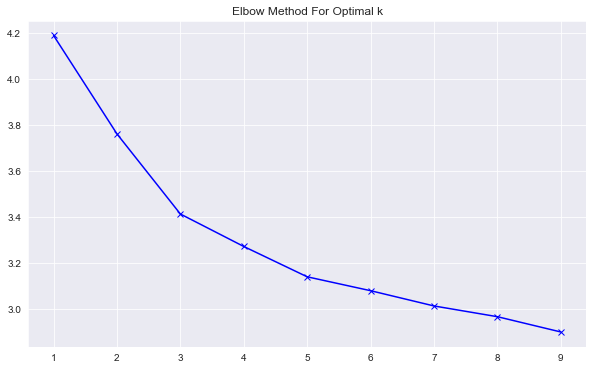

In [81]:
madrid_grouped_clustering = madrid_venues_grouped.drop('Neighbourhood', 1)
sum_of_squared_distances = []
K = range(1,10)

for k in K:
    print(k, end=' ')
    kmeans = KMeans(n_clusters=k, random_state=1, n_init=20).fit(madrid_grouped_clustering)
    sum_of_squared_distances.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.title('Elbow Method For Optimal k')

In [82]:
#---------------------------------------------------------------------------

In [83]:
# Clustering with K-Means

In [84]:
#---------------------------------------------------------------------------

In [85]:
# Clustering Neighborhoods in to 2 clusters
# set number of clusters
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=100).fit(madrid_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 0, 4, 0, 2, 2, 0, 0, 3])

In [86]:
# add clustering labels
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

madrid_merged = neighbourhoods_df

# merge madrid_grouped with df_madrid to add latitude/longitude for each neighbourhood
madrid_merged = madrid_merged.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

madrid_merged


,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,PALACIO,40.41517,-3.71273,3,Church,Historic Site,Spanish Restaurant,Restaurant,Monument / Landmark,Building,Bus Station,Bakery,Government Building,Beer Bar
1,EMBAJADORES,40.40803,-3.70067,0,Bar,Spanish Restaurant,Tapas Restaurant,Pizza Place,Theater,African Restaurant,Salon / Barbershop,Indian Restaurant,Coffee Shop,Restaurant
2,CORTES,40.41589,-3.69636,2,Spanish Restaurant,Embassy / Consulate,Hotel Bar,Hotel,Event Space,Japanese Restaurant,Restaurant,Tapas Restaurant,Office,Capitol Building
3,JUSTICIA,40.42479,-3.69308,2,Art Gallery,Office,Courthouse,Boutique,Embassy / Consulate,Post Office,Women's Store,Restaurant,Food,Building
4,UNIVERSIDAD,40.42565,-3.70726,0,Restaurant,Bookstore,Café,Bar,Breakfast Spot,Hostel,Electronics Store,College Library,Portuguese Restaurant,Falafel Restaurant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,ALAMEDA DE OSUNA,40.45818,-3.58953,0,Travel Agency,Bar,Bookstore,Bank,Italian Restaurant,Grocery Store,Pub,Spanish Restaurant,Gift Shop,General Entertainment
127,AEROPUERTO,40.48337,-3.55949,4,Airport Gate,Airport Service,Airport Lounge,Airport Terminal,Optical Shop,Newsstand,Miscellaneous Shop,Building,Rental Car Location,Airport
128,CASCO HISTÓRICO DE BARAJAS,40.47482,-3.57951,0,Bar,Plaza,Restaurant,Church,Coffee Shop,Spanish Restaurant,Pharmacy,BBQ Joint,City Hall,Doctor's Office
129,TIMÓN,40.48568,-3.60472,0,Rental Car Location,Diner,Spanish Restaurant,BBQ Joint,Airport Terminal,Supermarket,Restaurant,Beer Bar,Duty-free Shop,Bakery


In [87]:
#---------------------------------------------------------------------------bº

In [88]:
kmeans.labels_

array([0, 0, 0, 4, 0, 2, 2, 0, 0, 3, 3, 0, 3, 0, 2, 3, 2, 0, 0, 3, 0, 3,
       0, 0, 1, 0, 0, 3, 2, 2, 2, 0, 2, 3, 3, 0, 0, 2, 2, 0, 0, 3, 2, 3,
       3, 3, 3, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 2, 3,
       3, 2, 0, 3, 2, 0, 0, 3, 0, 2, 3, 0, 0, 2, 0, 0, 0, 3, 0, 3, 3, 0,
       3, 0, 3, 3, 0, 0, 3, 0, 0, 0, 3, 0, 3, 0, 3, 2, 0, 2, 3, 3, 3, 0,
       2, 2, 0, 2, 3, 0, 0, 0, 0, 3, 0, 3, 3, 0, 2, 3, 0, 0, 0, 0, 0])

In [89]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm. rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]




#add markers to the map
markers_colors = []
for lat, lon, area, cluster in zip(madrid_merged['Latitude'], madrid_merged['Longitude'], madrid_merged['Neighbourhood'], madrid_merged['Cluster Labels']):
    label = folium.Popup(remove_accents(str(area)) + ' Cluster ' + str(cluster), parse_html=True)

    folium.CircleMarker([lat, lon], radius=5, popup=label,# color=rainbow[cluster-1],
                         fill=True,
                        #fill_color=rainbow[cluster-1],
                        fill_opacity=0.7).add_to(map_clusters)

map_clusters

In [90]:
#---------------------------------------------------------------------------
madrid_merged.head()

,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,PALACIO,40.41517,-3.71273,3,Church,Historic Site,Spanish Restaurant,Restaurant,Monument / Landmark,Building,Bus Station,Bakery,Government Building,Beer Bar
1,EMBAJADORES,40.40803,-3.70067,0,Bar,Spanish Restaurant,Tapas Restaurant,Pizza Place,Theater,African Restaurant,Salon / Barbershop,Indian Restaurant,Coffee Shop,Restaurant
2,CORTES,40.41589,-3.69636,2,Spanish Restaurant,Embassy / Consulate,Hotel Bar,Hotel,Event Space,Japanese Restaurant,Restaurant,Tapas Restaurant,Office,Capitol Building
3,JUSTICIA,40.42479,-3.69308,2,Art Gallery,Office,Courthouse,Boutique,Embassy / Consulate,Post Office,Women's Store,Restaurant,Food,Building
4,UNIVERSIDAD,40.42565,-3.70726,0,Restaurant,Bookstore,Café,Bar,Breakfast Spot,Hostel,Electronics Store,College Library,Portuguese Restaurant,Falafel Restaurant


In [91]:
# Exploration of the clusters

In [92]:
madrid_merged.loc[madrid_merged['Cluster Labels'] == 0, madrid_merged.columns[[0] + list(range(4, madrid_merged.shape[1]))]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,EMBAJADORES,Bar,Spanish Restaurant,Tapas Restaurant,Pizza Place,Theater,African Restaurant,Salon / Barbershop,Indian Restaurant,Coffee Shop,Restaurant
4,UNIVERSIDAD,Restaurant,Bookstore,Café,Bar,Breakfast Spot,Hostel,Electronics Store,College Library,Portuguese Restaurant,Falafel Restaurant
6,IMPERIAL,Office,Laundry Service,School,Bakery,Bar,Spanish Restaurant,Convenience Store,Restaurant,Trade School,Gym / Fitness Center
7,ACACIAS,Park,Pizza Place,Café,Salon / Barbershop,Dance Studio,Bar,Tapas Restaurant,Church,Medical Center,Grocery Store
8,CHOPERA,Tapas Restaurant,Coworking Space,Wine Bar,Spanish Restaurant,Bar,Café,Plaza,Italian Restaurant,General Entertainment,Supermarket
...,...,...,...,...,...,...,...,...,...,...,...
124,CANILLEJAS,Park,Diner,Bar,Spanish Restaurant,Bank,Salon / Barbershop,Gym,Drugstore,Lottery Retailer,Coffee Shop
125,EL SALVADOR,Spanish Restaurant,Bank,Bar,Gym,Church,Coffee Shop,Toy / Game Store,Bakery,Sandwich Place,Grocery Store
126,ALAMEDA DE OSUNA,Travel Agency,Bar,Bookstore,Bank,Italian Restaurant,Grocery Store,Pub,Spanish Restaurant,Gift Shop,General Entertainment
128,CASCO HISTÓRICO DE BARAJAS,Bar,Plaza,Restaurant,Church,Coffee Shop,Spanish Restaurant,Pharmacy,BBQ Joint,City Hall,Doctor's Office


In [93]:
madrid_merged.loc[madrid_merged['Cluster Labels'] == 1, madrid_merged.columns[[0] + list(range(4, madrid_merged.shape[1]))]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
51,CASA DE CAMPO,Theme Park Ride / Attraction,Zoo Exhibit,Theme Park,Aquarium,Convenience Store,Park,Farm,Bus Line,Burger Joint,Metro Station


In [94]:
madrid_merged.loc[madrid_merged['Cluster Labels'] == 2, madrid_merged.columns[[0] + list(range(4, madrid_merged.shape[1]))]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,CORTES,Spanish Restaurant,Embassy / Consulate,Hotel Bar,Hotel,Event Space,Japanese Restaurant,Restaurant,Tapas Restaurant,Office,Capitol Building
3,JUSTICIA,Art Gallery,Office,Courthouse,Boutique,Embassy / Consulate,Post Office,Women's Store,Restaurant,Food,Building
9,LEGAZPI,Supermarket,Office,Bus Line,Pharmacy,Pizza Place,Racetrack,Automotive Shop,Parking,College Communications Building,Park
10,DELICIAS,Office,Gym / Fitness Center,Mediterranean Restaurant,Restaurant,Breakfast Spot,Capitol Building,Bank,Bar,Theater,Tennis Court
12,ATOCHA,Office,Bank,Train Station,Diner,Café,Sushi Restaurant,Restaurant,Coworking Space,Platform,Italian Restaurant
17,LOS JERÓNIMOS,Office,Café,Art Gallery,Italian Restaurant,Building,Spanish Restaurant,Coffee Shop,College Academic Building,Restaurant,Bakery
24,CASTELLANA,Office,Bank,Building,Bar,Cosmetics Shop,Salon / Barbershop,Café,Coffee Shop,General Entertainment,BBQ Joint
27,CIUDAD JARDÍN,Office,Bakery,Real Estate Office,Restaurant,Japanese Restaurant,Bus Stop,Supermarket,Tapas Restaurant,Other Great Outdoors,Auto Dealership
29,NUEVA ESPAÑA,Office,Dentist's Office,Student Center,Medical Center,University,General Entertainment,Deli / Bodega,Coworking Space,Cocktail Bar,Salon / Barbershop
30,CASTILLA,Office,General Entertainment,Pool,Spanish Restaurant,Church,Gas Station,School,Other Great Outdoors,Military Base,Tech Startup


In [95]:
madrid_merged.loc[madrid_merged['Cluster Labels'] == 3, madrid_merged.columns[[0] + list(range(4, madrid_merged.shape[1]))]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,PALACIO,Church,Historic Site,Spanish Restaurant,Restaurant,Monument / Landmark,Building,Bus Station,Bakery,Government Building,Beer Bar
5,SOL,Clothing Store,Hotel,Restaurant,Jewelry Store,Hostel,Accessories Store,Tapas Restaurant,Plaza,Church,Massage Studio
19,RECOLETOS,Boutique,Clothing Store,Health & Beauty Service,Miscellaneous Shop,Cosmetics Shop,Japanese Restaurant,Bar,Jewelry Store,Coffee Shop,Embassy / Consulate
43,EL PARDO,Bank,Spanish Restaurant,Parking,Bus Line,Building,Gas Station,General Entertainment,Basketball Court,School,Salon / Barbershop
44,FUENTELARREINA,Bank,Playground,Bakery,Building,Church,Convenience Store,Pool,Food & Drink Shop,Tapas Restaurant,Grocery Store
45,PEÑAGRANDE,Building,Office,Diner,Gas Station,Dentist's Office,Playground,Medical Center,Coworking Space,Grocery Store,Toy / Game Store
47,LA PAZ,Spanish Restaurant,Hospital,Breakfast Spot,Building,Bank,Parking,Gas Station,School,Doctor's Office,Newsstand
48,VALVERDE,Bakery,Park,Laundry Service,Building,Auto Workshop,Massage Studio,Medical Center,Salon / Barbershop,Mediterranean Restaurant,College Academic Building
49,MIRASIERRA,Hospital,Medical Center,Fast Food Restaurant,Pharmacy,Gas Station,Scenic Lookout,Gym / Fitness Center,Gym,Bank,Park
50,EL GOLOSO,College Library,College Academic Building,College Cafeteria,Post Office,Hospital,College Classroom,College Science Building,Restaurant,University,Café


In [96]:
madrid_merged.loc[madrid_merged['Cluster Labels'] == 4, madrid_merged.columns[[0] + list(range(4, madrid_merged.shape[1]))]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
127,AEROPUERTO,Airport Gate,Airport Service,Airport Lounge,Airport Terminal,Optical Shop,Newsstand,Miscellaneous Shop,Building,Rental Car Location,Airport


In [97]:
#---------------------------------------------------------------------------

In [98]:
# From now on, we will work only with the cluster 0 , since is the one with Most venues in Restaurants,bars,cafes,coffeeshops,desserts,icecream,liquor,pubs,restaurants,spas,tea,wines

In [99]:
#---------------------------------------------------------------------------
# Extracting the data from the clusters

In [100]:
leisure_cluster= 0
df_madrid_leisure = neighbourhoods_df[neighbourhoods_df['Neighbourhood'].isin(madrid_merged.loc[madrid_merged['Cluster Labels'] == leisure_cluster, 'Neighbourhood'].tolist())]

In [101]:
df_madrid_leisure

,Neighbourhood,Latitude,Longitude
1,EMBAJADORES,40.40803,-3.70067
4,UNIVERSIDAD,40.42565,-3.70726
6,IMPERIAL,40.40833,-3.71865
7,ACACIAS,40.40137,-3.70669
8,CHOPERA,40.39536,-3.69833
...,...,...,...
124,CANILLEJAS,40.44373,-3.60977
125,EL SALVADOR,40.44384,-3.63477
126,ALAMEDA DE OSUNA,40.45818,-3.58953
128,CASCO HISTÓRICO DE BARAJAS,40.47482,-3.57951


In [102]:
#---------------------------------------------------------------------------

In [103]:
# Finding the most popular venues in the cluster
#Repo for api foursquare ID's
#https://gist.github.com/mraaroncruz/0a9e4968f7149821ca74

#Wine Shop id = 4bf58dd8d48988d119951735
#Liquor Store id =4bf58dd8d48988d186941735

In [104]:
CLIENT_ID = tok1 # Foursquare ID
CLIENT_SECRET = tok2 # Foursquare Secret
ACCESS_TOKEN = '' # FourSquare Access Token
VERSION = '20180323' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Credentails:')
print('CLIENT_ID: ' + tok1)
print('CLIENT_SECRET:' + tok2)

Credentails:
CLIENT_ID: RRLQJ3E2XUVOIOJ1JCCTVG5T2TW5EUVL35NBIEAJGO5UHUH2
CLIENT_SECRET:IZUZ45XFYXTK0NNIBHIF412VCEOZGOMSLUN5CWOT50IERA5S


In [105]:
# Category ID in Foursquare API

Wine_Bar_id=  '4bf58dd8d48988d123941735'

# Function to count the number of market-like venues in a given neighbourhood
def getwine(row):

    # create the API request URL
    url2 = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&radius={}&limit={}'.format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        row['Latitude'],
        row['Longitude'],
        Wine_Bar_id,
        radius,
        LIMIT)

    # make the GET request and get get length of venues
    results2 = requests.get(url2).json()["response"]['venues']
    count = len(results2)


    # return count
    return count

In [106]:
getwine(df_madrid_leisure.iloc[0])

50

In [107]:
df_madrid_leisure['Wine Bar Count'] = df_madrid_leisure.apply(getwine, axis=1)

C:\Users\PLATER~1\AppData\Local\Temp/ipykernel_7792/2998419683.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_madrid_leisure['Wine Bar Count'] = df_madrid_leisure.apply(getwine, axis=1)


In [108]:
df_madrid_leisure

,Neighbourhood,Latitude,Longitude,Wine Bar Count
1,EMBAJADORES,40.40803,-3.70067,50
4,UNIVERSIDAD,40.42565,-3.70726,47
6,IMPERIAL,40.40833,-3.71865,50
7,ACACIAS,40.40137,-3.70669,43
8,CHOPERA,40.39536,-3.69833,18
...,...,...,...,...
124,CANILLEJAS,40.44373,-3.60977,1
125,EL SALVADOR,40.44384,-3.63477,3
126,ALAMEDA DE OSUNA,40.45818,-3.58953,0
128,CASCO HISTÓRICO DE BARAJAS,40.47482,-3.57951,4


In [109]:
df_madrid_leisure['Wine Bar Count'].max()

50

In [110]:
#---------------------------------------------------------------------------
#Merging data from the clusters with the data from excels

In [111]:
#---------------------------------------------------------------------------

In [112]:
# Left join of df_madrid_income and df_madrid_leisure


In [113]:
df_madrid_leisure = df_madrid_leisure.join(df_madrid_income.set_index('Neighbourhood'), on='Neighbourhood')
df_madrid_leisure

,Neighbourhood,Latitude,Longitude,Wine Bar Count,Income
1,EMBAJADORES,40.40803,-3.70067,50,26761.0
4,UNIVERSIDAD,40.42565,-3.70726,47,31866.0
6,IMPERIAL,40.40833,-3.71865,50,35479.0
7,ACACIAS,40.40137,-3.70669,43,NaN
8,CHOPERA,40.39536,-3.69833,18,NaN
...,...,...,...,...,...
124,CANILLEJAS,40.44373,-3.60977,1,31834.0
125,EL SALVADOR,40.44384,-3.63477,3,NaN
126,ALAMEDA DE OSUNA,40.45818,-3.58953,0,NaN
128,CASCO HISTÓRICO DE BARAJAS,40.47482,-3.57951,4,NaN


In [114]:
df_madrid_leisure.dtypes

Neighbourhood      object
Latitude          float64
Longitude         float64
Wine Bar Count      int64
Income            float64
dtype: object

In [115]:
df_madrid_income.dtypes

Neighbourhood    object
Income            int32
dtype: object

In [117]:
df_madrid_population.dtypes

Neighbourhood     object
Age               object
Population       float64
dtype: object

In [118]:
#Changing Income to int
df_madrid_leisure = df_madrid_leisure.merge(df_madrid_population, how='left', on='Neighbourhood')
df_madrid_leisure

,Neighbourhood,Latitude,Longitude,Wine Bar Count,Income,Age,Population
0,EMBAJADORES,40.40803,-3.70067,50,26761.0,35 - 39,5107.0
1,UNIVERSIDAD,40.42565,-3.70726,47,31866.0,35 - 39,3281.0
2,IMPERIAL,40.40833,-3.71865,50,35479.0,35 - 39,1660.0
3,ACACIAS,40.40137,-3.70669,43,NaN,35 - 39,2733.0
4,CHOPERA,40.39536,-3.69833,18,NaN,35 - 39,1710.0
...,...,...,...,...,...,...,...
62,CANILLEJAS,40.44373,-3.60977,1,31834.0,35 - 39,1950.0
63,EL SALVADOR,40.44384,-3.63477,3,NaN,35 - 39,529.0
64,ALAMEDA DE OSUNA,40.45818,-3.58953,0,NaN,35 - 39,1020.0
65,CASCO HISTÓRICO DE BARAJAS,40.47482,-3.57951,4,NaN,NaN,NaN


In [120]:
#dropping the neighborhoods that in Income are less than 30000
df_madrid_leisure = df_madrid_leisure[df_madrid_leisure['Income'] > 30000]
df_madrid_leisure

,Neighbourhood,Latitude,Longitude,Wine Bar Count,Income,Age,Population
1,UNIVERSIDAD,40.42565,-3.70726,47,31866.0,35 - 39,3281.0
2,IMPERIAL,40.40833,-3.71865,50,35479.0,35 - 39,1660.0
6,PACÍFICO,40.40191,-3.67603,6,36935.0,NaN,NaN
7,ADELFAS,40.40173,-3.67288,5,46144.0,35 - 39,1433.0
9,IBIZA,40.41794,-3.67626,23,46829.0,35 - 39,1492.0
11,GOYA,40.42547,-3.67418,29,50739.0,35 - 39,2091.0
13,GUINDALERA,40.43241,-3.66600,16,46915.0,35 - 39,3008.0
14,LISTA,40.43231,-3.67508,29,49641.0,35 - 39,1368.0
16,PROSPERIDAD,40.44180,-3.66925,16,44699.0,35 - 39,2664.0
17,HISPANOAMÉRICA,40.45688,-3.67698,6,63487.0,NaN,NaN


In [121]:
#---------------------------------------------------------------------------
# Finding the ideal Neighbourhood for the user, making a relationship between the number of Wine Bars and the number of people living in the neighbourhood

In [122]:
#---------------------------------------------------------------------------

In [116]:
# Creating a new column with the ratio of the number of people living in the neighbourhood and the number of Wine Bars
df_madrid_leisure['Ratio'] = df_madrid_leisure['Population']/df_madrid_leisure['Wine Bar Count']
df_madrid_leisure

ZeroDivisionError: division by zero

In [128]:
#---------------------------------------------------------------------------
# Testing the visualization

In [130]:
# Saving datafrmaes in to csv files
df_madrid_leisure.to_csv('df_madrid_leisure.csv')
df_madrid_income.to_csv('df_madrid_income.csv')
df_madrid_population.to_csv('df_madrid_population.csv')
madrid_venues.to_csv('madrid_venues.csv')
madrid_merged.to_csv('madrid_merged.csv')
neighbourhoods_df.to_csv('neighbourhoods_df.csv')